## Install npgamma

The following cell uncommented will install npgamma

In [1]:
# !pip install npgamma

## Imports dependencies for example

In [2]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request

from npgamma import calc_gamma_2d

## Load example data

In [3]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/SimonBiggs/npgamma/master/data_equal_grid.yml", 
    "data_equal_grid.yml")

with open('data_equal_grid.yml', 'r') as file:
    data = yaml.load(file)

## The grid sizes of the reference and evaluation need to be equal

In [4]:
x = data['x']
np.shape(x)

(121,)

In [5]:
d = data['d']
np.shape(d)

(151,)

In [6]:
mephisto_dose_grid = data['mephisto_dose_grid']
np.shape(mephisto_dose_grid)

(151, 121)

In [7]:
monaco_dose_grid = data['monaco_dose_grid']
np.shape(monaco_dose_grid)

(151, 121)

## Calculate Gamma

In [8]:
x_new, d_new, gamma = calc_gamma_2d(
    x, d, monaco_dose_grid, mephisto_dose_grid,
    distance_threshold=2, dose_threshold=2)

## Display output

In [9]:
flat_gamma = np.ravel(gamma)
np.sum(flat_gamma < 1) / len(flat_gamma)

0.99494665918023584

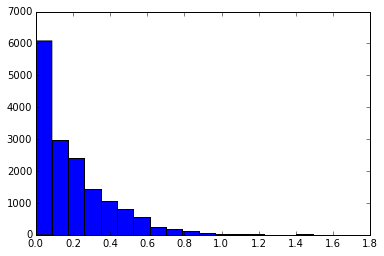

In [10]:
plt.hist(flat_gamma, 20);

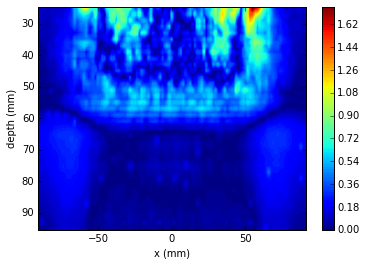

In [11]:
plt.contourf(x_new, d_new, gamma, 100)
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel('depth (mm)')

## Time taken to calculate

In [12]:
%%timeit

x_new, d_new, gamma = calc_gamma_2d(
    x, d, monaco_dose_grid, mephisto_dose_grid,
    distance_threshold=2, dose_threshold=2)

100 loops, best of 3: 11.5 ms per loop
